In [ ]:
# table 만들기
f2015.createOrReplaceTempView("flights2015")    f2015에서 "flights2015"라는 table를 만든다

In [ ]:
# dataframe
f2015.groupBy("DEST_COUNTRY_NAME").count().show()

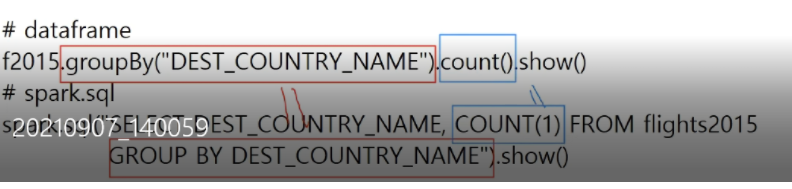


In [ ]:
# spark.sql

In [ ]:
spark.sql("SELECT DEST_COUNTRY_NAME, COUNT(1) FROM flights2015 GROUP BY DEST_COUNTRY_NAME").show()

In [ ]:
# spark.sql은 ansi표준을 따른다.